# Importing all necessary Libraries

In [58]:
import pandas as pd # for linear algebra
import numpy as np # for data processing
import matplotlib.pyplot as plt # For visualization of data
import seaborn as sns # For visualization of data
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Data Encoders
from sklearn.model_selection import train_test_split # Data Splitting
from sklearn.linear_model import LogisticRegression # Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # Model Performance Metrics
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, confusion_matrix,auc,roc_curve

In [2]:
pip uninstall imblearn --yes

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/

In [4]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\Fraud.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

Checking the Null Values

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Checking the Duplicates

In [8]:
df.duplicated().sum()

0

Getting the information

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Checking the descriptive stats of the data 

In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Defining function to remove Outliers

In [11]:
# Removing outliers using z-score method
# Parameters:
# 1. df = the data frame
# 2. sigma = the value of sigma, I will assign sigma to have a value of 3
def RemoveOutliers(df, sigma=3, unique=10):
    for col in df.columns:
      if df[col].nunique() > unique:
        df = df[(df[col] > (df[col].mean() - df[col].std()*sigma )) & (df[col] < (df[col].mean() + df[col].std()*sigma ))]
    return df

# Function for preprocessing the data
def preprocessing_data(df):
    df["DestType"] = [x[0] for x in df['nameDest']] # seperates C and M in each value in nameDest column and stores it in a new column DestType
    df['nameDest'] = np.array([x[1:] for x in df['nameDest']]).astype(np.int64) # removes C and M in each value in nameDest column and saves it as integers
    df['nameOrig'] = np.array([x[1:] for x in df['nameOrig']]).astype(np.int64) # removes C and M in each value in nameOrig column and saves it as integers
    return df

Some Irregularities in the Data:
In case of cash transferred from origin to destination, newbalanceDest sometimes doesn't reflect that change (possible fraud).
In case of cash transferred from origin to destination, the required amount is not in oldbalanceOrg (possible fraud).
Values in nameOrig sometimes have 9 digits instead of 10.
Single transactions of 200000 and above should be marked as 1 in isFlaggedFraud column yet a lot of times they are not.

In [12]:
# made a copy of the dataframe
df_cp = df.copy() 

# preprocessing the dataframe
df_cp = preprocessing_data(df_cp) 


In [13]:
df_cp.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,DestType
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0,M
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0,M
2,1,TRANSFER,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,0,C
3,1,CASH_OUT,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,0,C
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0,M


# Exploratory Data Analysis

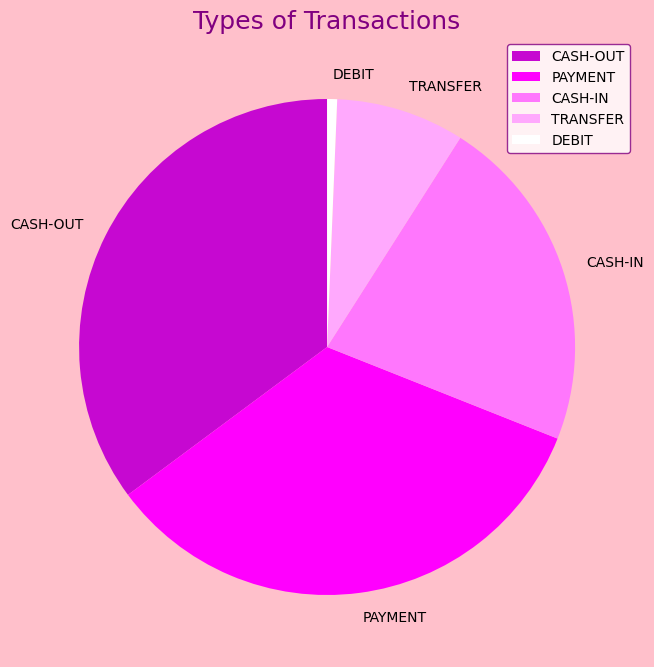

In [14]:
# Making object of figure class

fig = plt.figure() 
color = ['#c608d1', '#ff00fe', '#ff77fd', '#ffA9fd', 'white'] # color for the pie chart
label = ['CASH-OUT', 'PAYMENT', 'CASH-IN', 'TRANSFER', 'DEBIT'] # label for each divisions of the pie chart
plt.pie(df_cp['type'].value_counts(), colors=color, labels=label, startangle=90) # making the chart with start angle for plotting
# set to 90 degrees

fig.patch.set_facecolor('pink') # background color set to pink
fig.set_size_inches(8, 9) # total size of the chart 8 x 9 inches
plt.legend(edgecolor='purple') # legend shown with purple edges instead of the default color white
plt.title('Types of Transactions', fontsize=18, color='purple') # title set with fontsize of 18 and purple color
plt.show() # plot drawn

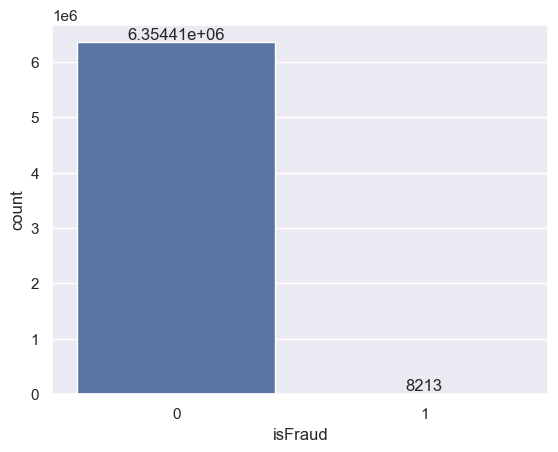

In [43]:
df1 = sns.countplot(x = 'isFraud',data=df)

for bars in df1.containers:
    df1.bar_label(bars)

Box plot

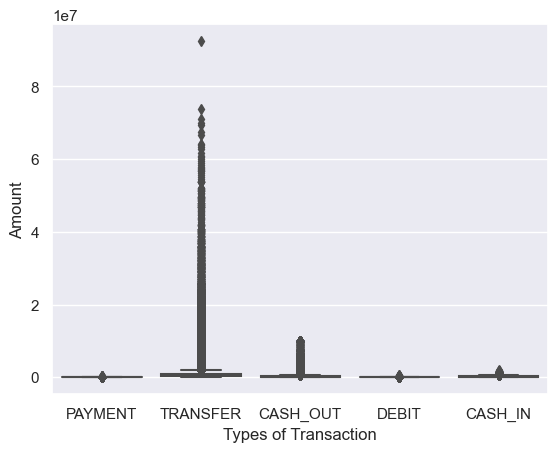

In [15]:
sns.set(style='darkgrid') # background color for the plot
sns.boxplot(x='type', y='amount', data=df_cp) # make the box plot with values of 'type' column on x-axis and values of 'amount' columns on y-axis
plt.xlabel('Types of Transaction') # label for x-axis
plt.ylabel('Amount') # label for y-axis
plt.show() # plot the box plot

Heat Map

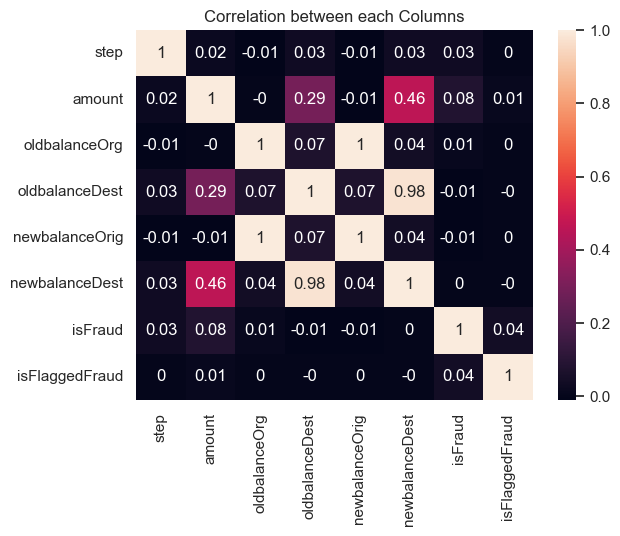

In [16]:
col = ['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceOrig', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
sns.heatmap(df[col].corr().round(2), annot=True) # make the plot with all values rounded up to 2 decimal places
plt.title('Correlation between each Columns') # title for the plot
plt.show()

<Axes: >

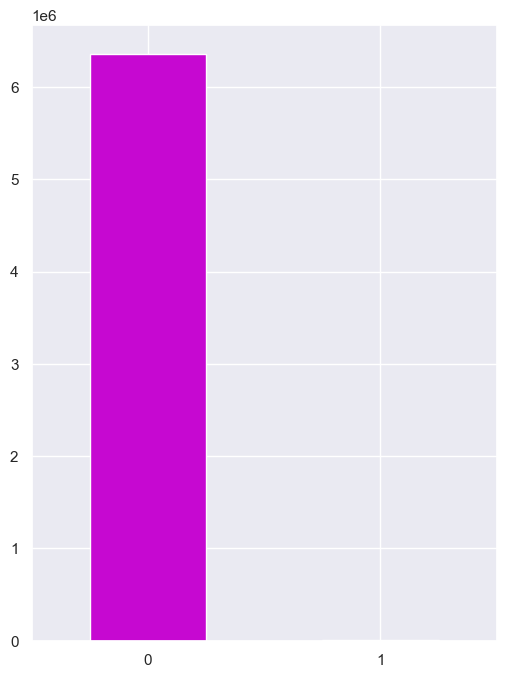

In [17]:
color = ['#c608d1', '#ff00fe'] # color bar plots of Is Fraud
df['isFraud'].value_counts().plot.bar(figsize=(6,8), color=color, rot=0) # make and show the plot with figure size 6 x 8 inches
# and rotation of the labels of x-axis set to 0

# Data Prepping for training the model

Dropping columns and selecting Factors which are important selecting model

Here, dropping the columns 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest' and 'newbalanceDest' as noted in the description of the dataset. I am also dropping 'isFlaggedFraud' because it is useless along with the 'nameDest' and 'nameOrg' columns because they are just ids of the senders and recievers

In [18]:
df_cp = df_cp.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)

# Encoding the data

In [19]:
# Encoding features with data type strings
ohe_columns = ['type', 'DestType'] # features to be encoded to integers
ohe = OneHotEncoder(sparse=False).fit(df_cp[ohe_columns]) # encode the columns specified and return an array
encoded = ohe.transform(df_cp[ohe_columns]) # transformed the array
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out()) # converted array to a data frame
df_cp = pd.concat([df_cp[[x for x in df_cp.columns if x not in ohe_columns]].reset_index(drop=True),encoded_df], axis=1)
# finally concatenate both dataframes and in the process remove 'type' and 'DestType' columns with the encoded ones

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Removing Outliers

In [20]:
df_cp = RemoveOutliers(df_cp, 3)

Scaling the data

In [21]:
#Scaling Data
# I will using MinMaxScaler to scale data

scaled = MinMaxScaler().fit_transform(df_cp)
df_cp = pd.DataFrame(scaled, columns=df_cp.columns)

Splitting the data 

In [22]:
# First splitting target column from other columns to perform Under Sampling

col = [c for c in df_cp.columns.to_list() if c not in ['isFraud']] # Save the names of columns apart from the target column
X = df_cp[col] # Split target column from other columns and save the columns in another data frame
Y = df_cp['isFraud'] # Split target column from other columns and save in another data frame

In [23]:
# Apply random under sampling for majority of the two values (which in this case is 0) to balance the data
RUS = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_samp,Y_samp = RUS.fit_resample(X,Y)

In [24]:
# Since the data frame is converted to a list of tuples, we need to convert them back to a data frame
X_samp = pd.DataFrame(X_samp, columns=col)
Y_samp = pd.DataFrame(Y_samp, columns=['isFraud'])

In [25]:
df_cp = pd.concat([X_samp, Y_samp], axis=1) # After converting, concatenate them

<Axes: xlabel='isFraud'>

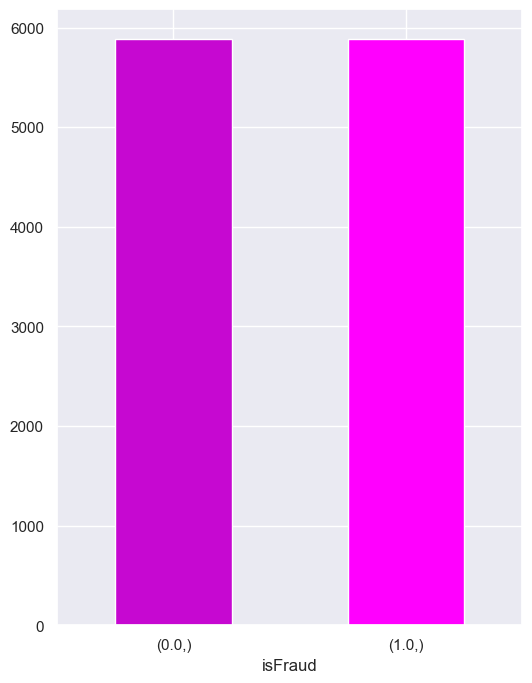

In [26]:
# Sample ratio after Under Sampling
color = ['#c608d1', '#ff00fe'] # color bar plots of Is Fraud
Y_samp.value_counts().plot.bar(figsize=(6,8), color=color, rot=0) # make and show the plot with figure size 6 x 8 inches
# and rotation of the labels of x-axis set to 0

In [27]:
# Again splitting data sets but now for training and testing the model
X = df_cp[col]
Y = df_cp['isFraud']

In [28]:
# Split the data into 2 seperate groups, one to train the model with and one to test the model with
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.90, random_state=42, stratify=df_cp['isFraud'])

# Logistic Regression

In [29]:
# Since this is a Classification Problem, I will apply Logistic Regression
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

In [30]:
# Evaluating the model through different evaluation metrics
accuracy = accuracy_score(Y_test, log.predict(X_test))
precision = precision_score(Y_test, log.predict(X_test))
recall = recall_score(Y_test, log.predict(X_test))
f1 = f1_score(Y_test, log.predict(X_test))
conf_matrix = confusion_matrix(Y_test, log.predict(X_test))

In [31]:
# Showing the values
print("Accuracy:", accuracy.round(3))
print("Precision:", precision.round(3))
print("Recall:", recall.round(3))
print("F1-score:", f1.round(3))
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.814
Precision: 0.775
Recall: 0.885
F1-score: 0.826
Confusion Matrix:
 [[438 151]
 [ 68 521]]


# Performing over sampling and training the model

In [32]:
# Now we will use the same imbalanced data and we will oversample it

# First splitting target column from other columns to perform Over Sampling

col = [c for c in df_cp.columns.to_list() if c not in ['isFraud']] # Save the names of columns apart from the target column
X = df_cp[col] # Split target column from other columns and save the columns in another data frame
Y = df_cp['isFraud'] # Split target column from other columns and save in another data frame

In [33]:
# Apply SMOTE over sampling for minority of the two values (which in this case is 1) to balance the data
smt = SMOTE(random_state=42, sampling_strategy='minority')
X_samp,Y_samp = smt.fit_resample(X,Y)

In [34]:
# Converting the tuples back to a data frame
X_samp = pd.DataFrame(X_samp, columns=col)
Y_samp = pd.DataFrame(Y_samp, columns=['isFraud'])
df_cp = pd.concat([X_samp, Y_samp], axis=1)

<Axes: xlabel='isFraud'>

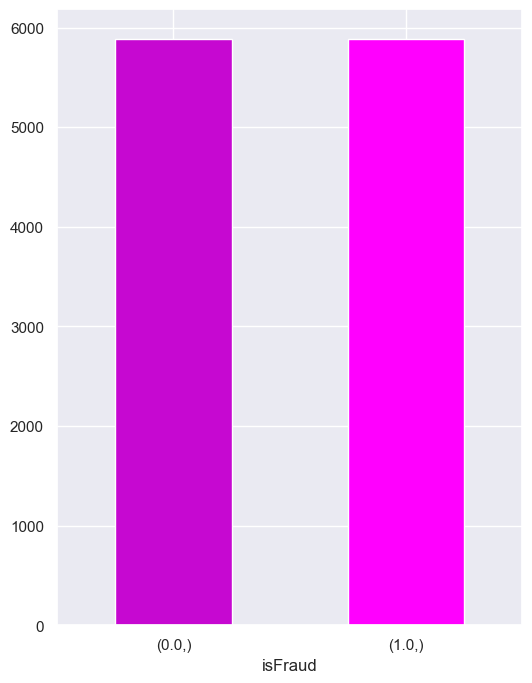

In [35]:
# Sample ratio after Over Sampling
color = ['#c608d1', '#ff00fe'] # color bar plots of Is Fraud
Y_samp.value_counts().plot.bar(figsize=(6,8), color=color, rot=0) # make and show the plot with figure size 6 x 8 inches
# and rotation of the labels of x-axis set to 0

In [36]:
# Again splitting data sets but now for training and testing the model
X = df_cp[col]
Y = df_cp['isFraud']

In [37]:
# Split the data into 2 seperate groups, one to train the model with and one to test the model with
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.20, random_state=42, stratify=df_cp['isFraud'])

In [38]:
# Training the Model
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

In [39]:
# Evaluating the model through different evaluation metrics
accuracy = accuracy_score(Y_test, log.predict(X_test))
precision = precision_score(Y_test, log.predict(X_test))
recall = recall_score(Y_test, log.predict(X_test))
f1 = f1_score(Y_test, log.predict(X_test))
conf_matrix = confusion_matrix(Y_test, log.predict(X_test))

In [40]:
# Showing the values
print("Accuracy:", accuracy.round(3))
print("Precision:", precision.round(3))
print("Recall:", recall.round(3))
print("F1-score:", f1.round(3))
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.808
Precision: 0.774
Recall: 0.869
F1-score: 0.819
Confusion Matrix:
 [[3520 1192]
 [ 618 4094]]


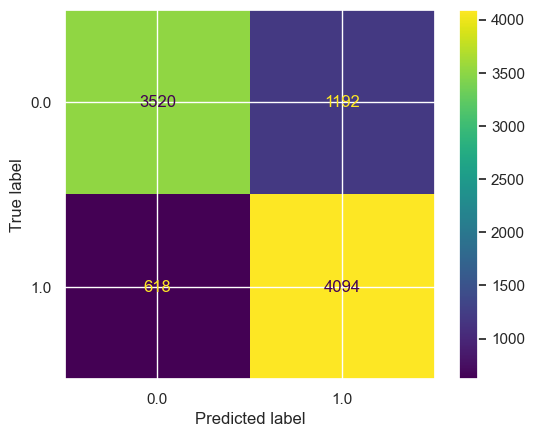

In [46]:
ConfusionMatrixDisplay.from_estimator(log, X_test, Y_test)

# ROC Curve

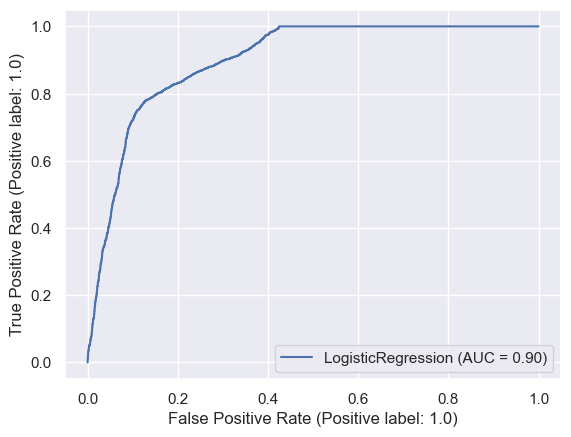

In [56]:
RocCurveDisplay.from_estimator(log, X_test, Y_test)

# Random Forest

In [59]:
rf = RandomForestClassifier()

In [60]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [61]:
rf_pred=rf.predict(X_test)

In [62]:
print("Accuracy:",accuracy_score(Y_test,rf_pred))

Accuracy: 0.8598259762308998


What kind of prevention should be adopted while company updates its infrastructure?


By integrating the fraud detection model with business processes, workflows, and fraud prevention mechanisms within the organization and collaborating with domain experts, fraud analysts, and investigators to interpret model predictions, investigate flagged transactions, and take appropriate action.

Assuming these actions have been implemented , how would you determine if they work?

By monitoring above changes in performance metrics like ROC Curve ,over time to assess the model's stability and effectiveness in detecting fraudulent activities.
